<a href="https://colab.research.google.com/github/FalineRezvani/Classification/blob/main/KMeansCustomerCategories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reference Information

In [ ]:
# This Jupyter notebook will implement the machine learning algorithm, K-Means Clustering to categorize customers.
# Developer: Faline Rezvani
# This dataset can be aquired from this link: https://www.kaggle.com/datasets/prathamtripathi/customersegmentation

# Setting Initial Configuration

In [ ]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)

# Data Ingestion and Initial Inspection

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Telecust1.csv')

In [ ]:
df

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,27,0,0,3,0,0,1,3,A
996,1,7,34,22,0,2,5,5,0,1,1,A
997,3,67,59,944,0,40,5,33,0,1,1,D
998,3,70,49,87,0,18,2,22,0,1,1,C


# **Exploratory Data Analysis**

In [ ]:
df.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [ ]:
df.tail()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
995,3,10,39,27,0,0,3,0,0,1,3,A
996,1,7,34,22,0,2,5,5,0,1,1,A
997,3,67,59,944,0,40,5,33,0,1,1,D
998,3,70,49,87,0,18,2,22,0,1,1,C
999,3,50,36,39,1,7,3,3,0,1,3,B


In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
df.dtypes

region      int64
tenure      int64
age         int64
income      int64
marital     int64
address     int64
ed          int64
employ      int64
retire      int64
gender      int64
reside      int64
custcat    object
dtype: object

In [ ]:
# Checking for missing values
df.isna().sum()

region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [ ]:
df.describe()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,77.535000,0.495000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000
std,0.8162,21.359812,12.558816,107.044165,0.500225,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793
min,1.0000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1668.000000,1.000000,55.000000,5.000000,47.000000,1.000000,1.000000,8.000000


In [ ]:
df.describe(include='object')

,custcat
count,1000
unique,4
top,C
freq,281


In [ ]:
df.corr()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
region,1.000000,0.016388,0.015034,0.023765,-0.080637,0.010320,-0.057952,0.016335,0.005595,0.050596,-0.065158
tenure,0.016388,1.000000,0.490217,0.242912,0.154171,0.522952,-0.109797,0.520288,0.171143,0.023533,-0.036592
age,0.015034,0.490217,1.000000,0.327948,-0.014433,0.660435,-0.154857,0.670047,0.429440,-0.011419,-0.254993
income,0.023765,0.242912,0.327948,1.000000,-0.043984,0.226781,0.113939,0.516349,-0.083651,0.038706,-0.097591
marital,-0.080637,0.154171,-0.014433,-0.043984,1.000000,-0.012051,0.001400,-0.002891,-0.078109,0.008345,0.625999
address,0.010320,0.522952,0.660435,0.226781,-0.012051,1.000000,-0.128330,0.463291,0.292503,0.008363,-0.201645
ed,-0.057952,-0.109797,-0.154857,0.113939,0.001400,-0.128330,1.000000,-0.228580,-0.114229,0.006704,0.021045
employ,0.016335,0.520288,0.670047,0.516349,-0.002891,0.463291,-0.228580,1.000000,0.277401,0.046016,-0.134683
retire,0.005595,0.171143,0.429440,-0.083651,-0.078109,0.292503,-0.114229,0.277401,1.000000,0.053906,-0.140120
gender,0.050596,0.023533,-0.011419,0.038706,0.008345,0.008363,0.006704,0.046016,0.053906,1.000000,0.016556


In [ ]:
# Setting figure size in Seaborn
sns.set(rc={'figure.figsize': (15, 12)})

<Axes: >

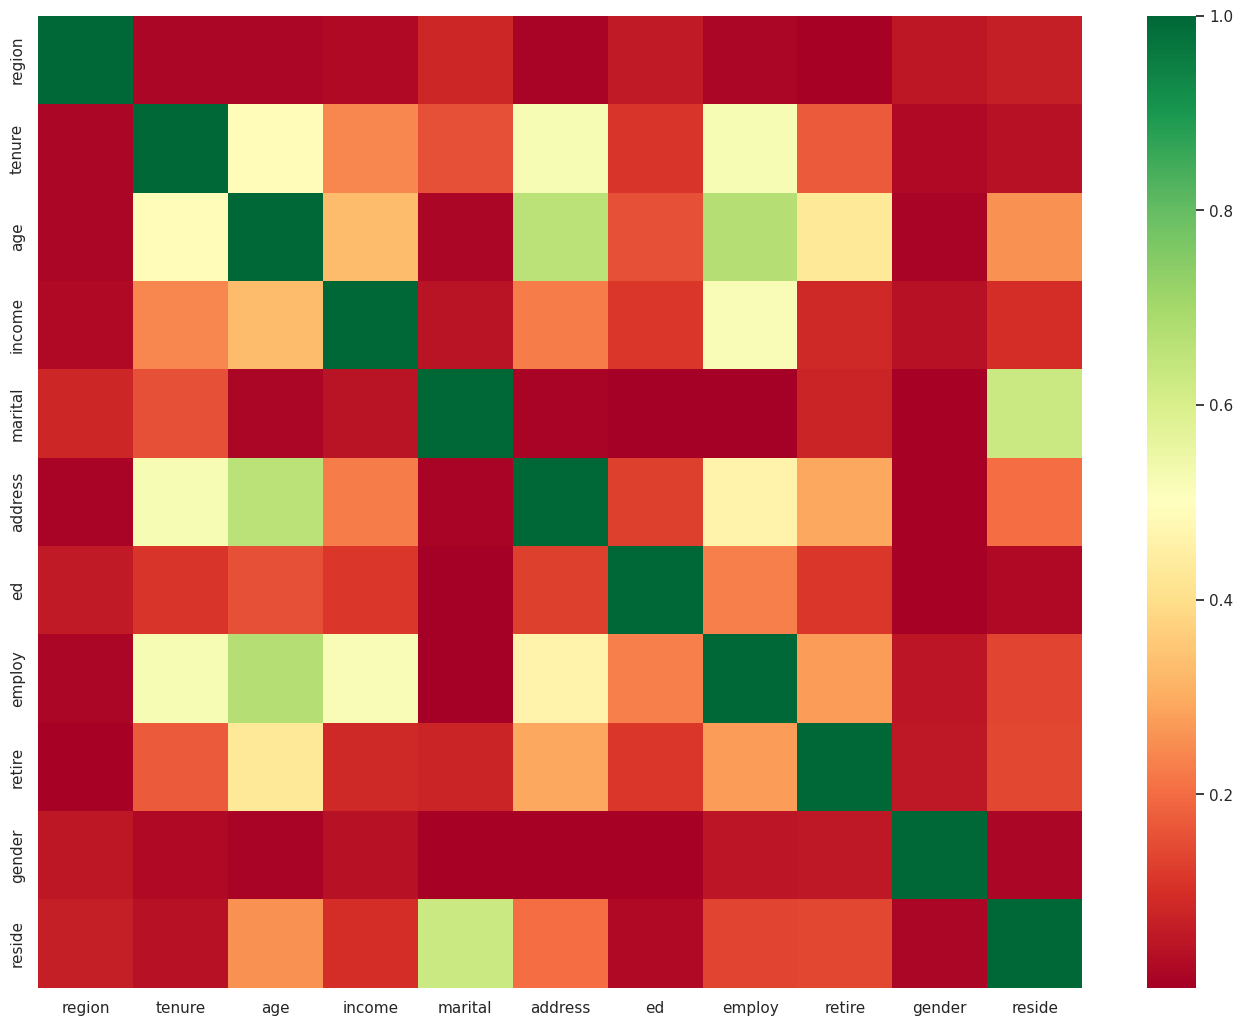

In [ ]:
#.abs - absolute value, cmap - colormap
sns.heatmap(df.corr().abs(), cmap = 'RdYlGn')

#Region

In [ ]:
df['region'].value_counts()

3    344
2    334
1    322
Name: region, dtype: int64

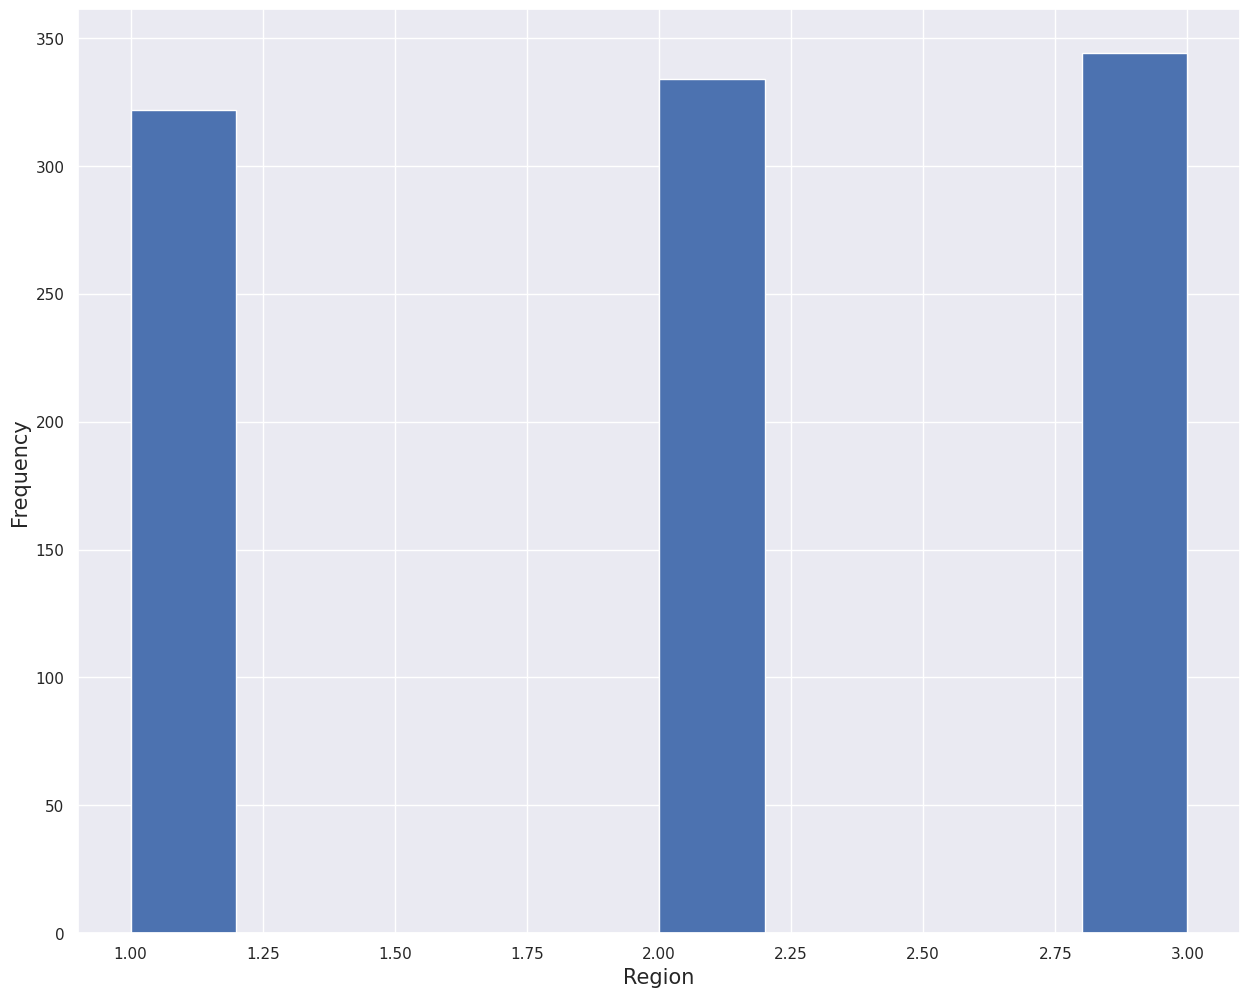

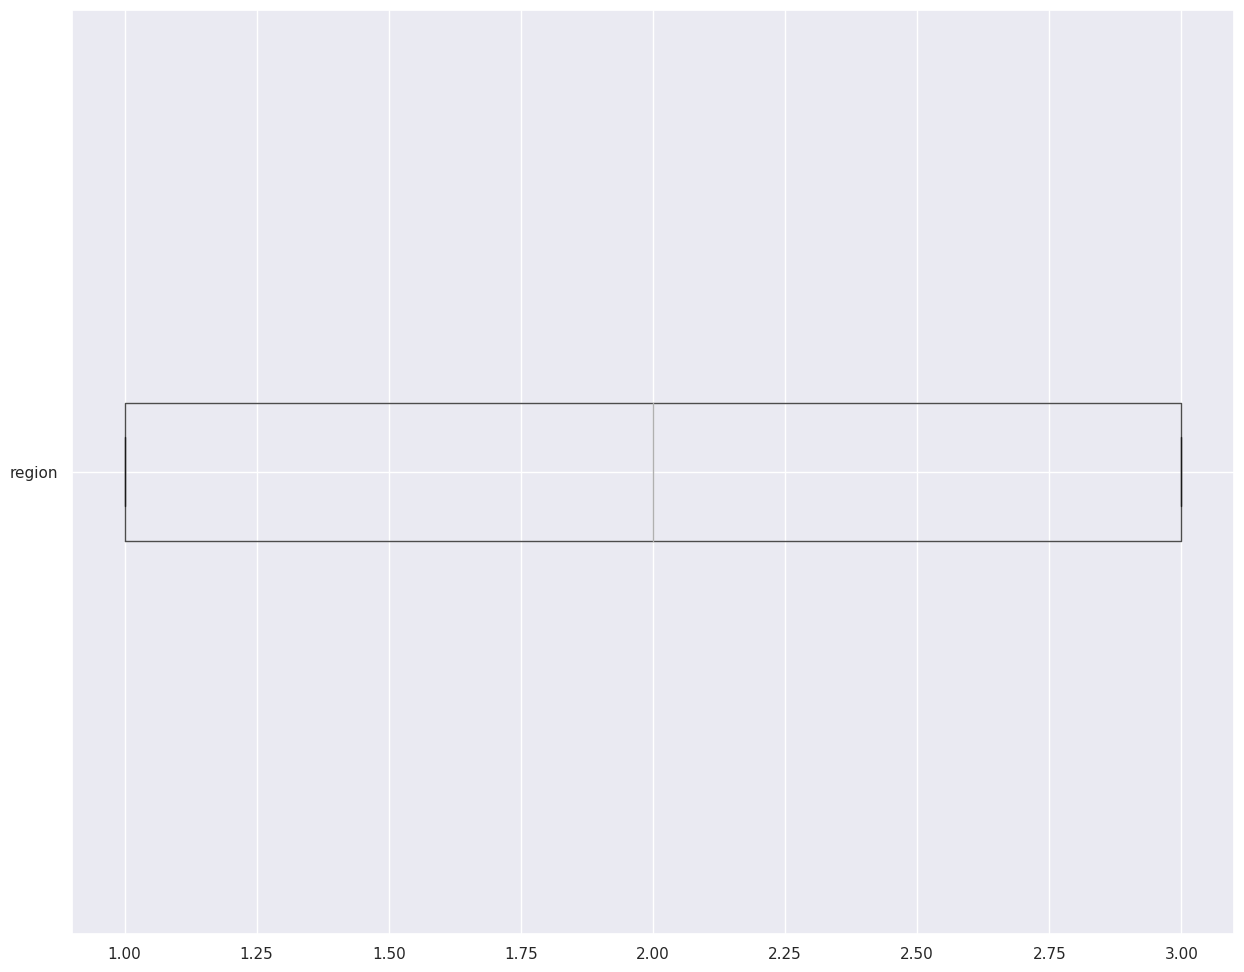

In [ ]:
# Histogram to show distribution
df['region'].plot(kind='hist')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='region', vert=False)
plt.show()

#Tenure

In [ ]:
df['tenure'].value_counts()

72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: tenure, Length: 72, dtype: int64

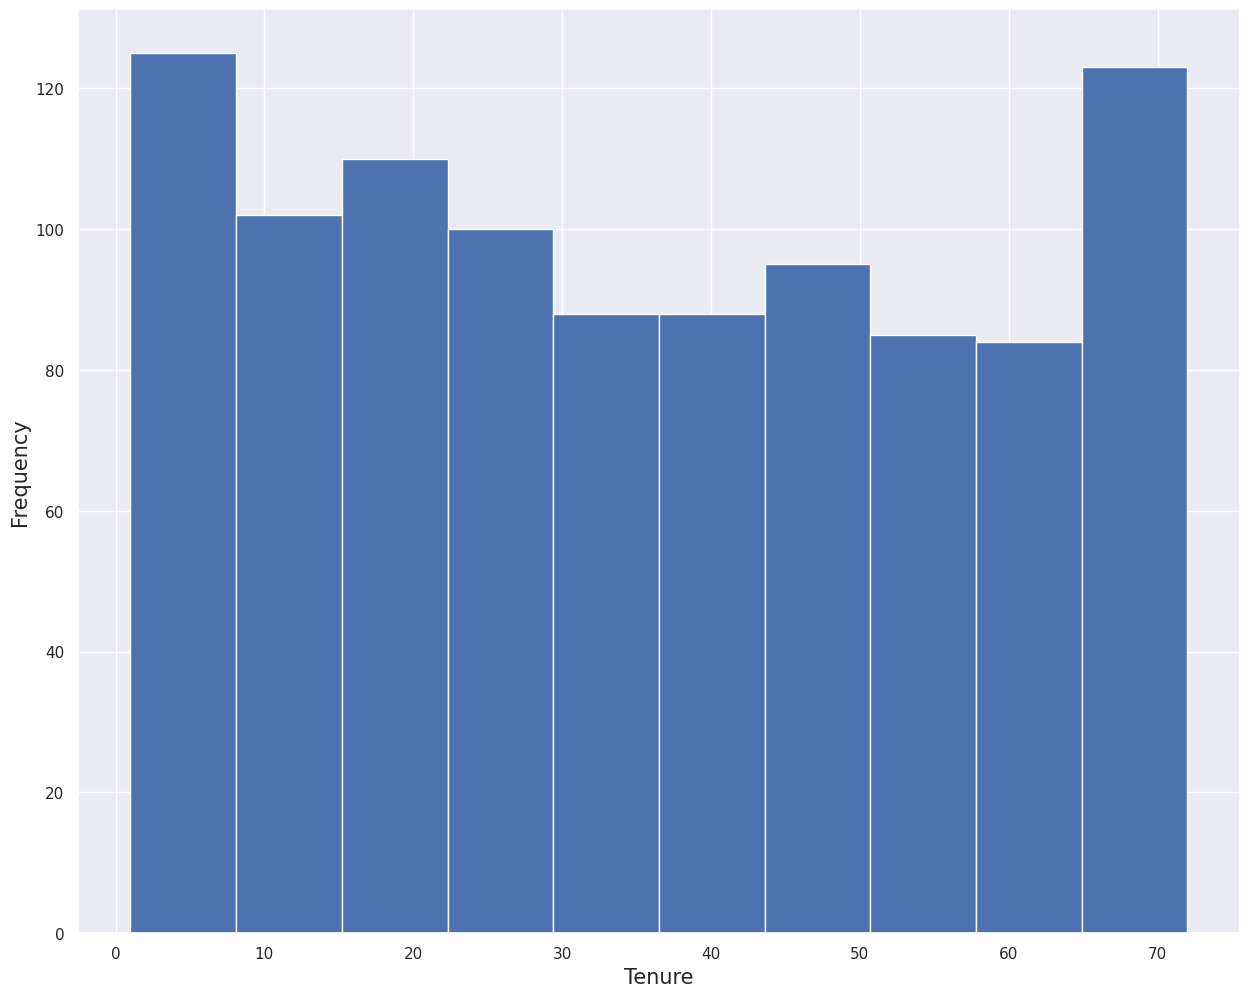

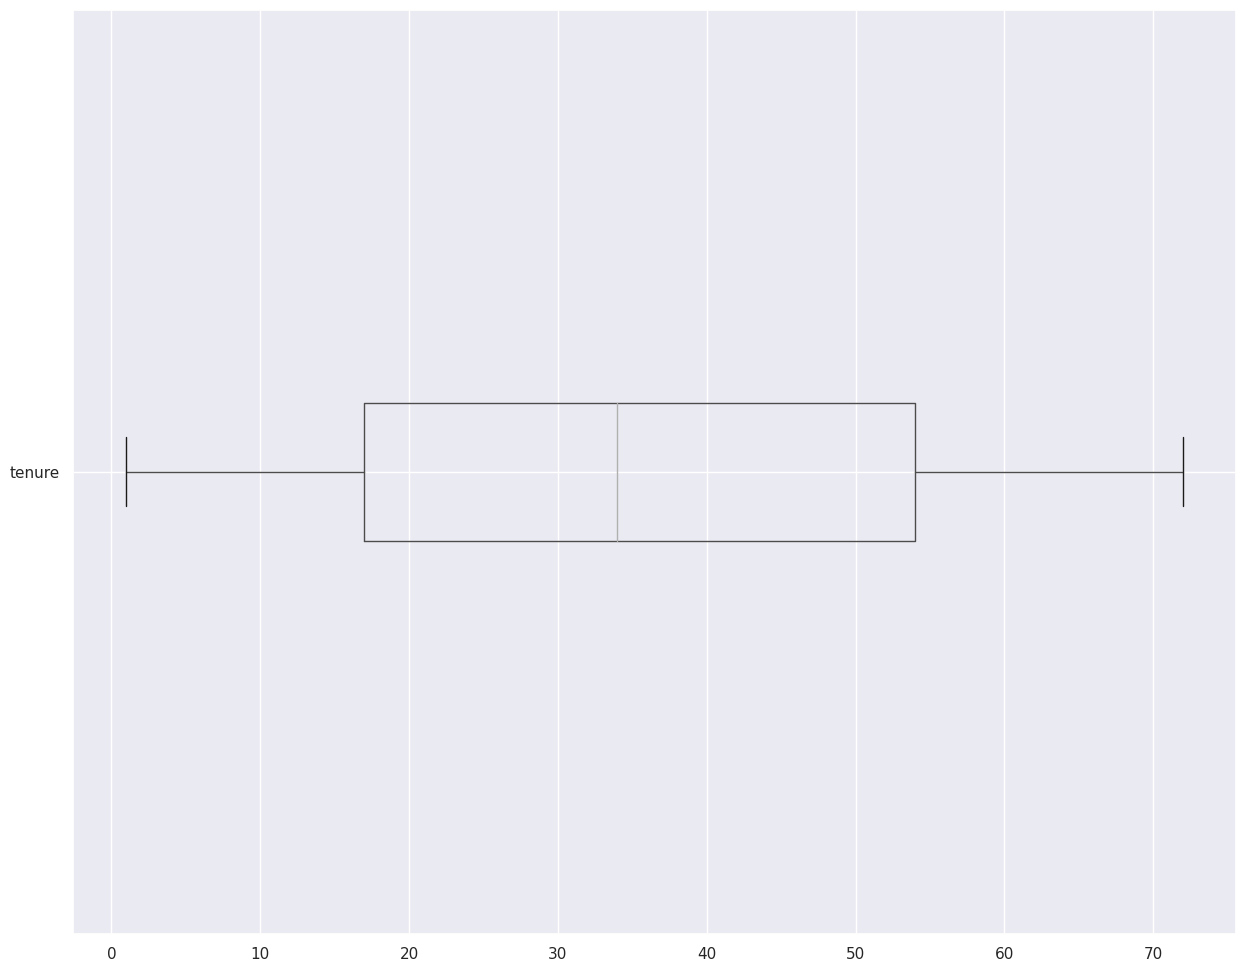

In [ ]:
# Histogram to show distribution
df['tenure'].plot(kind='hist')
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='tenure', vert=False)
plt.show()

#Age

In [ ]:
df['age'].value_counts()

33    39
39    35
35    34
31    32
34    32
      ..
72     1
74     1
77     1
18     1
73     1
Name: age, Length: 60, dtype: int64

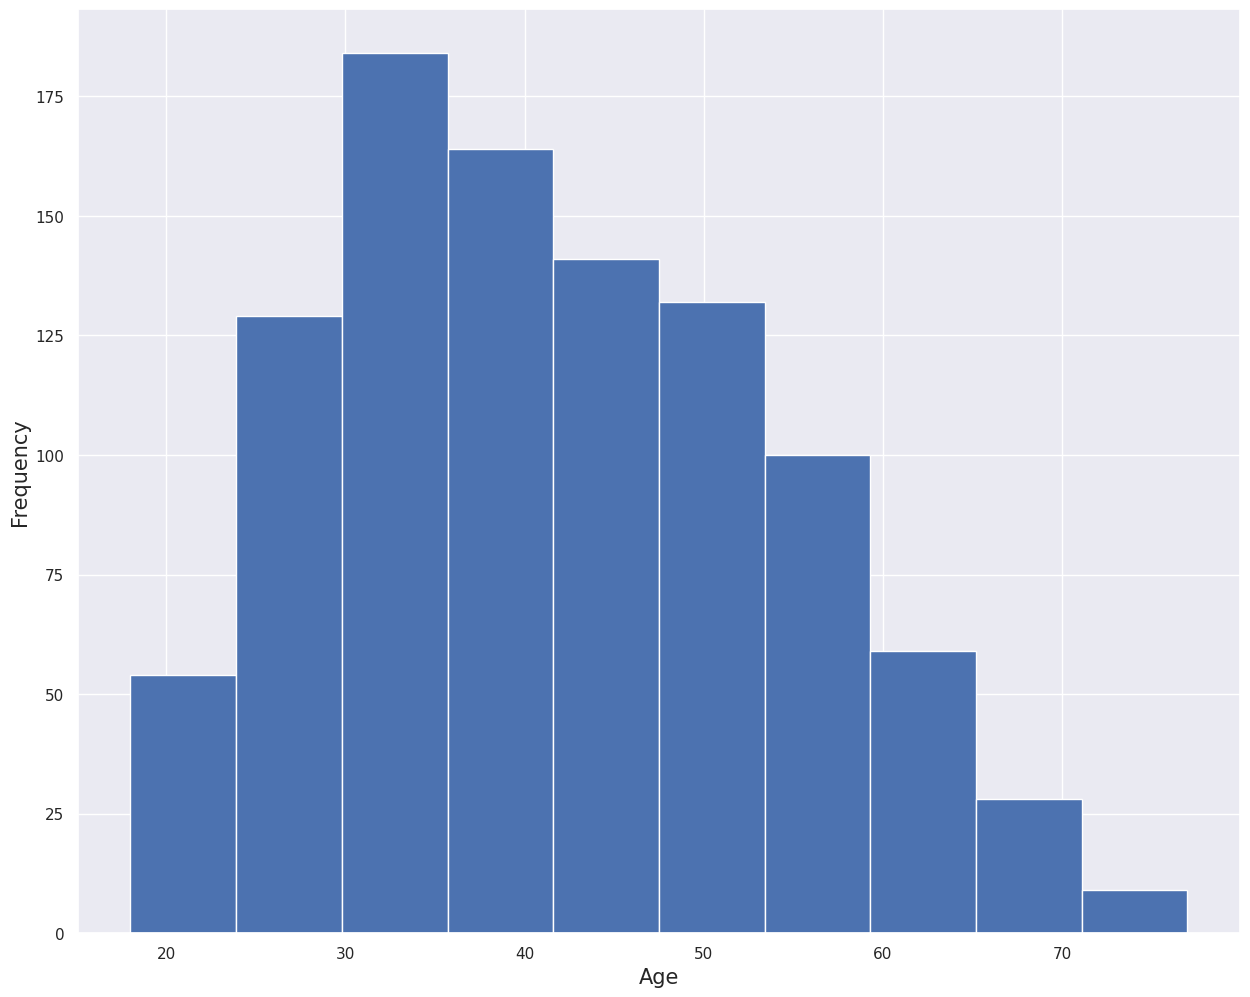

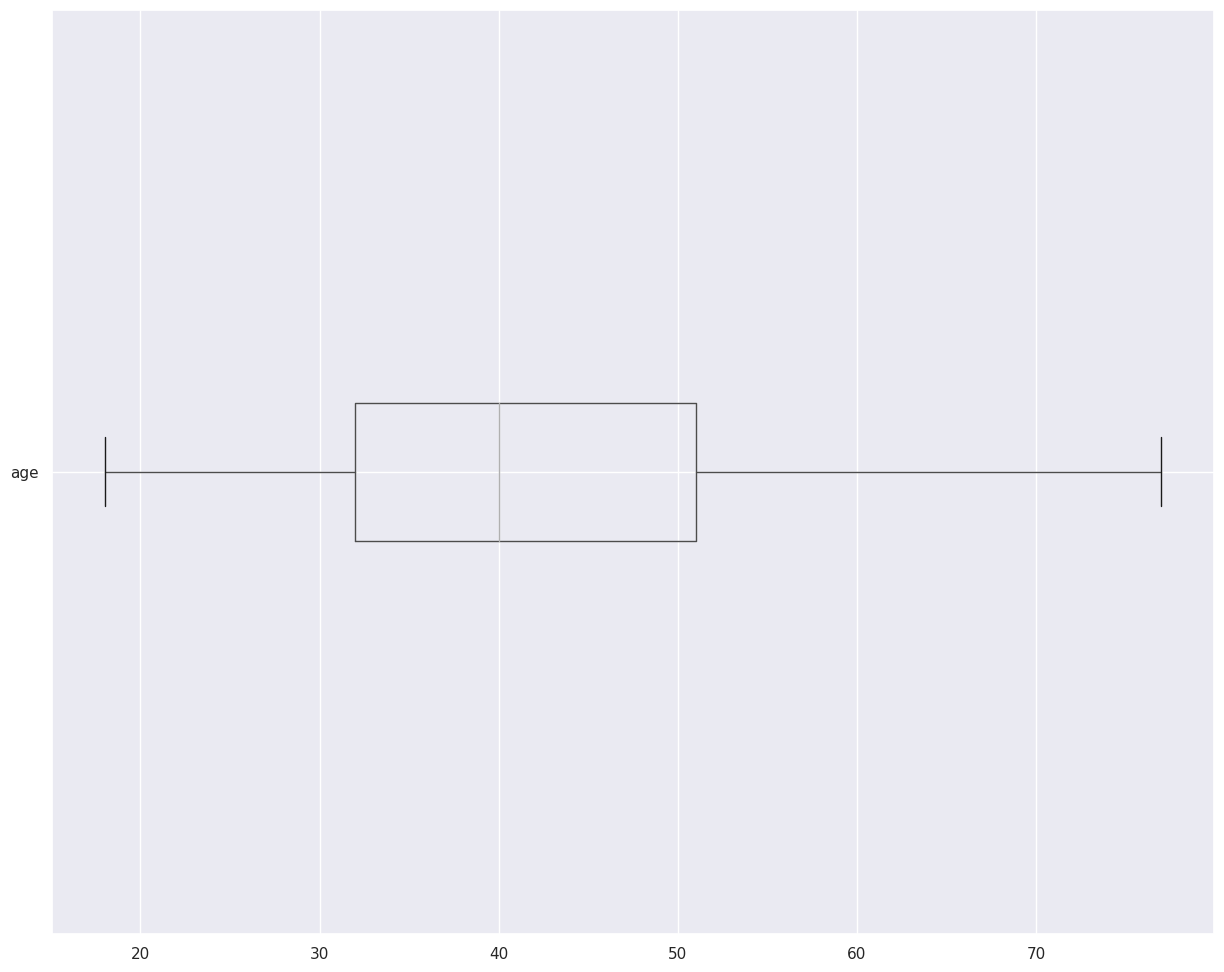

In [ ]:
# Histogram to show distribution
df['age'].plot(kind='hist')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='age', vert=False)
plt.show()

#Income

In [ ]:
df['income'].value_counts()

25     24
26     22
41     22
33     20
46     19
       ..
200     1
250     1
674     1
187     1
944     1
Name: income, Length: 218, dtype: int64

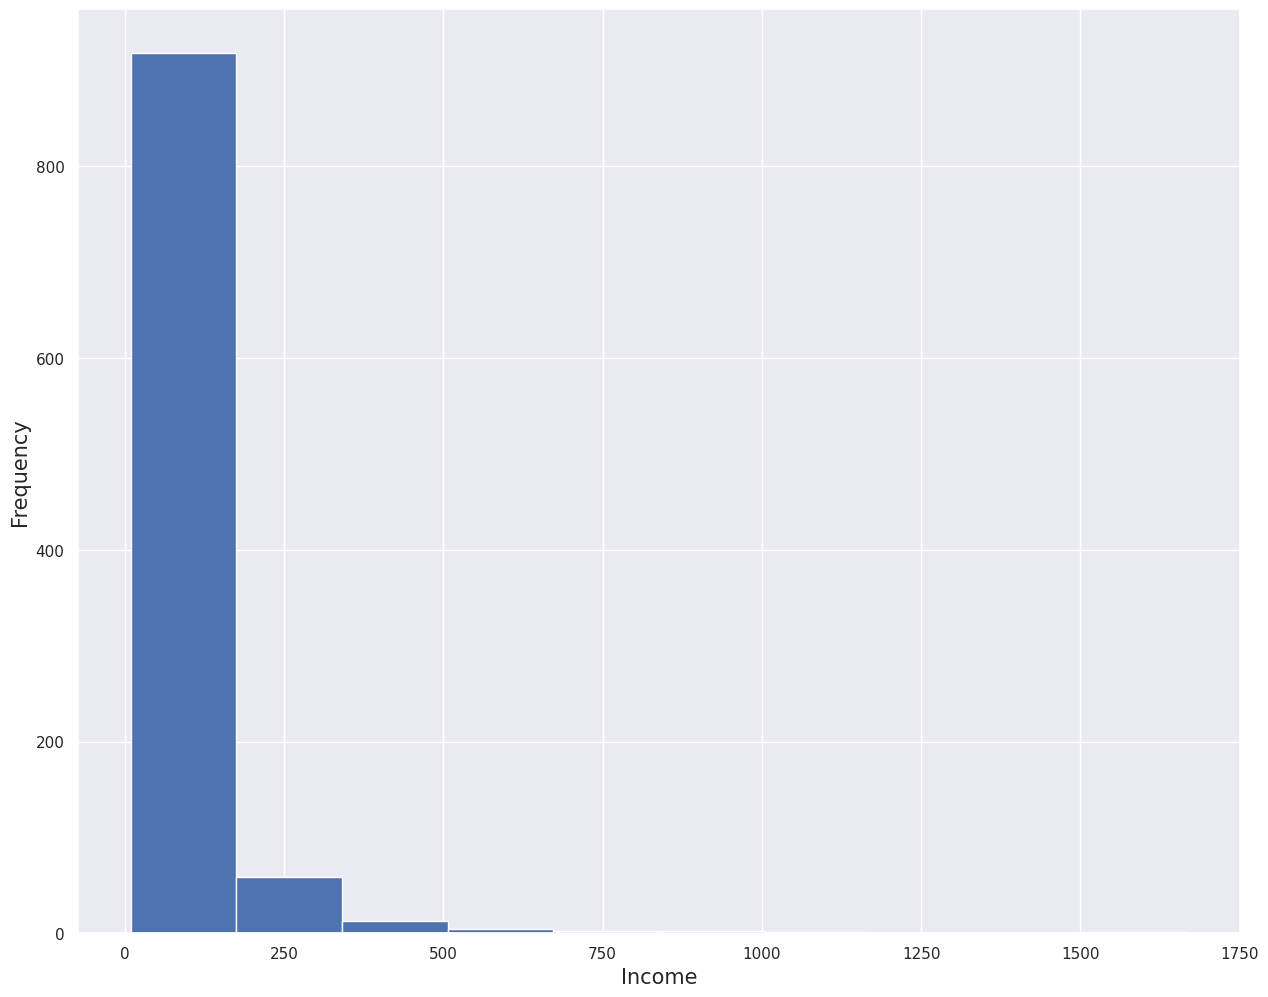

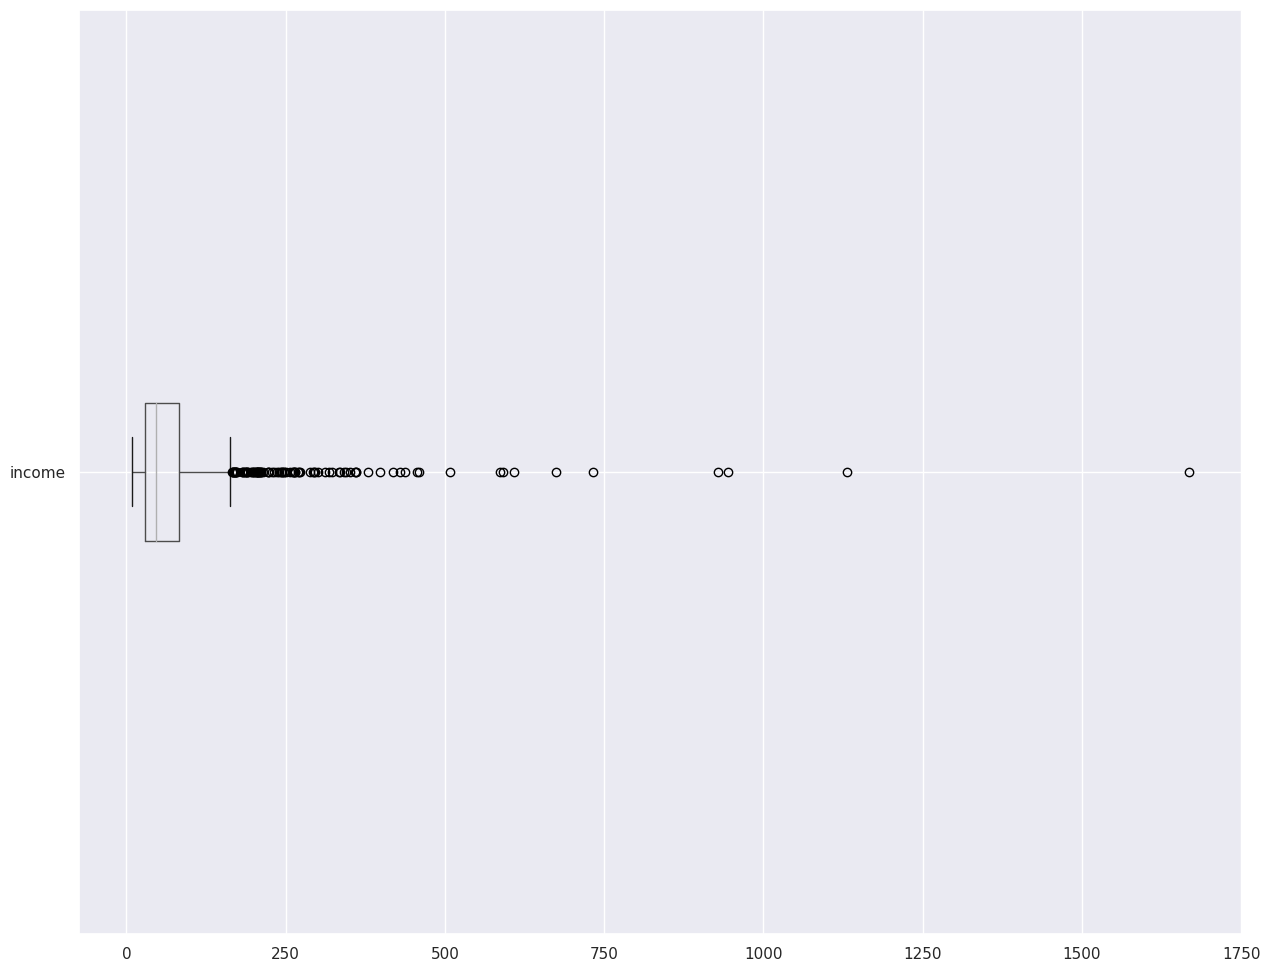

In [ ]:
# Histogram to show distribution
df['income'].plot(kind='hist')
plt.xlabel('Income', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='income', vert=False)
plt.show()

# Marital Status

In [ ]:
df['marital'].value_counts()

0    505
1    495
Name: marital, dtype: int64

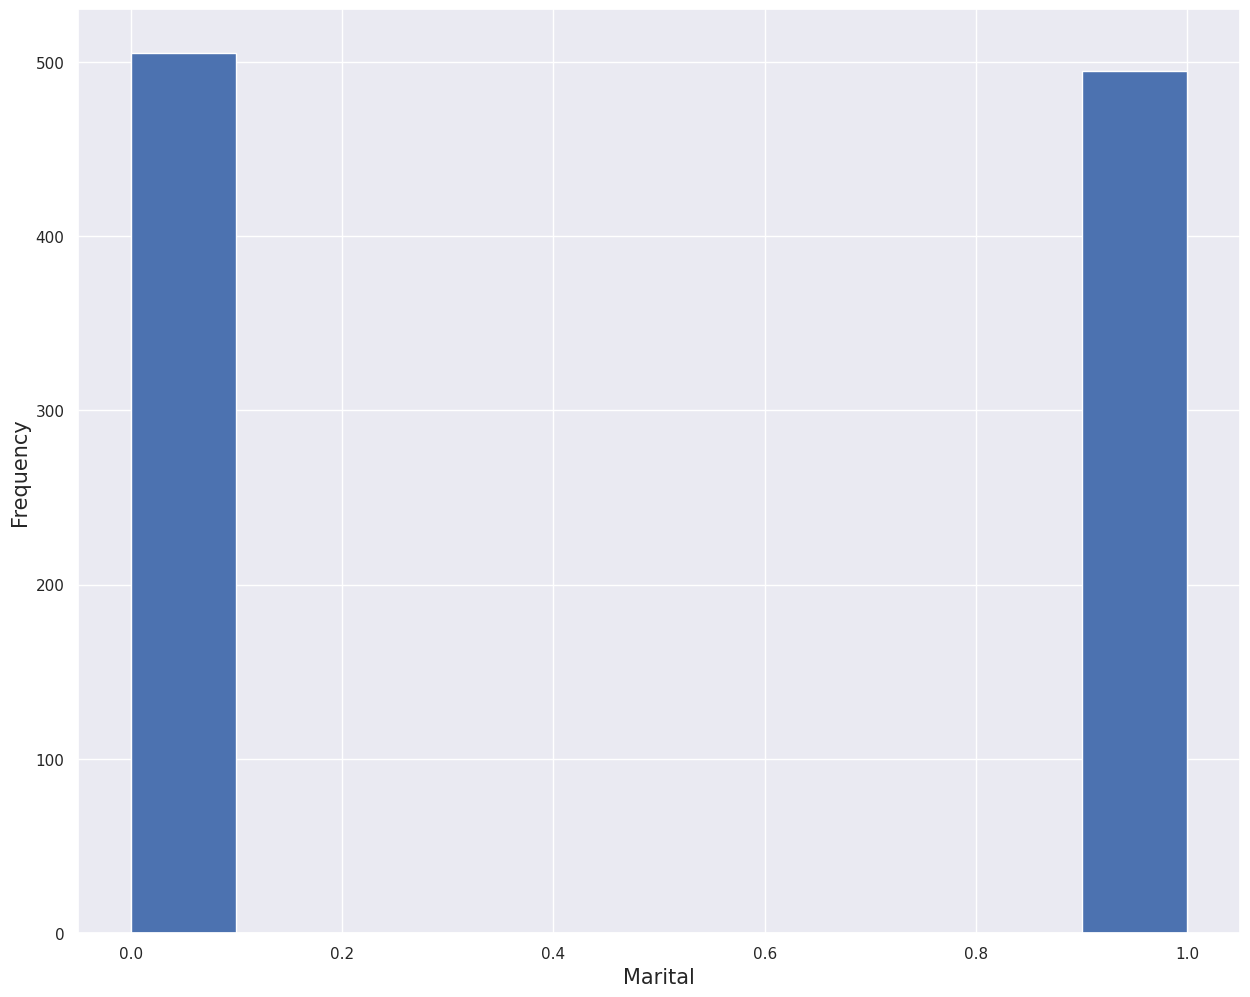

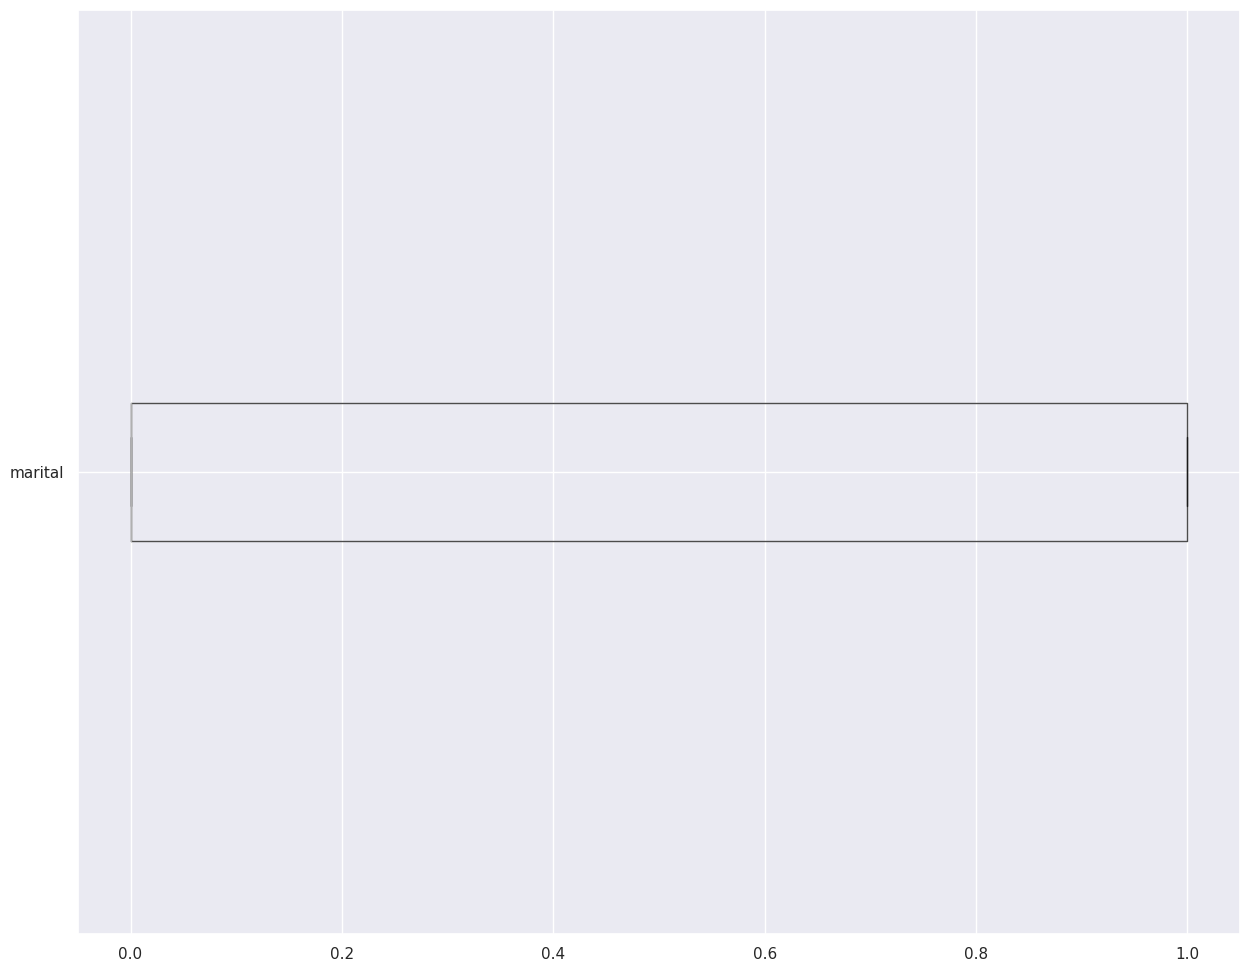

In [ ]:
# Histogram to show distribution
df['marital'].plot(kind='hist')
plt.xlabel('Marital', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='marital', vert=False)
plt.show()

# Address

In [ ]:
df['address'].value_counts()

1     68
2     66
4     61
3     61
0     56
      ..
45     1
48     1
42     1
46     1
55     1
Name: address, Length: 50, dtype: int64

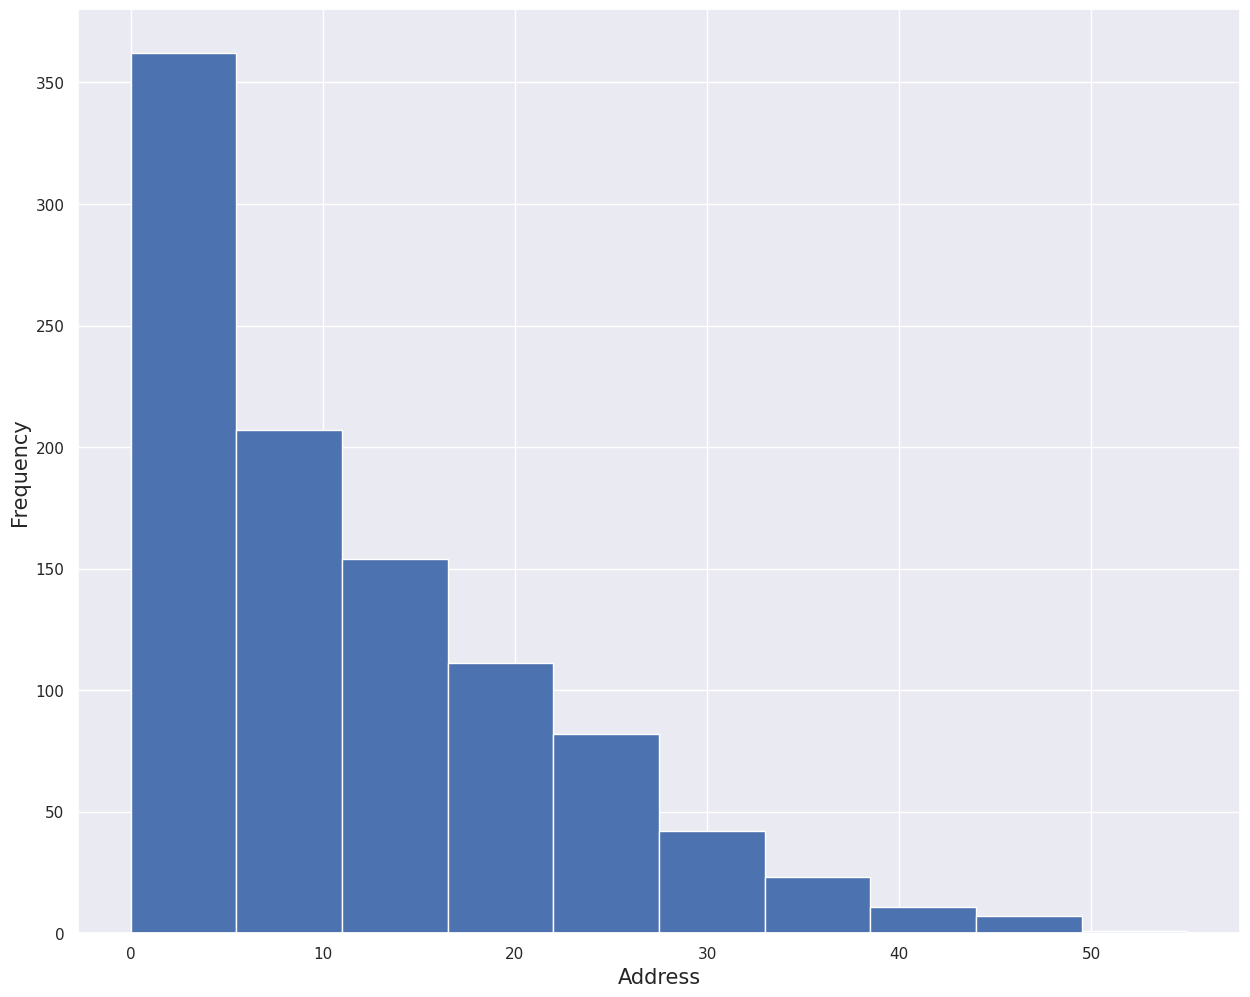

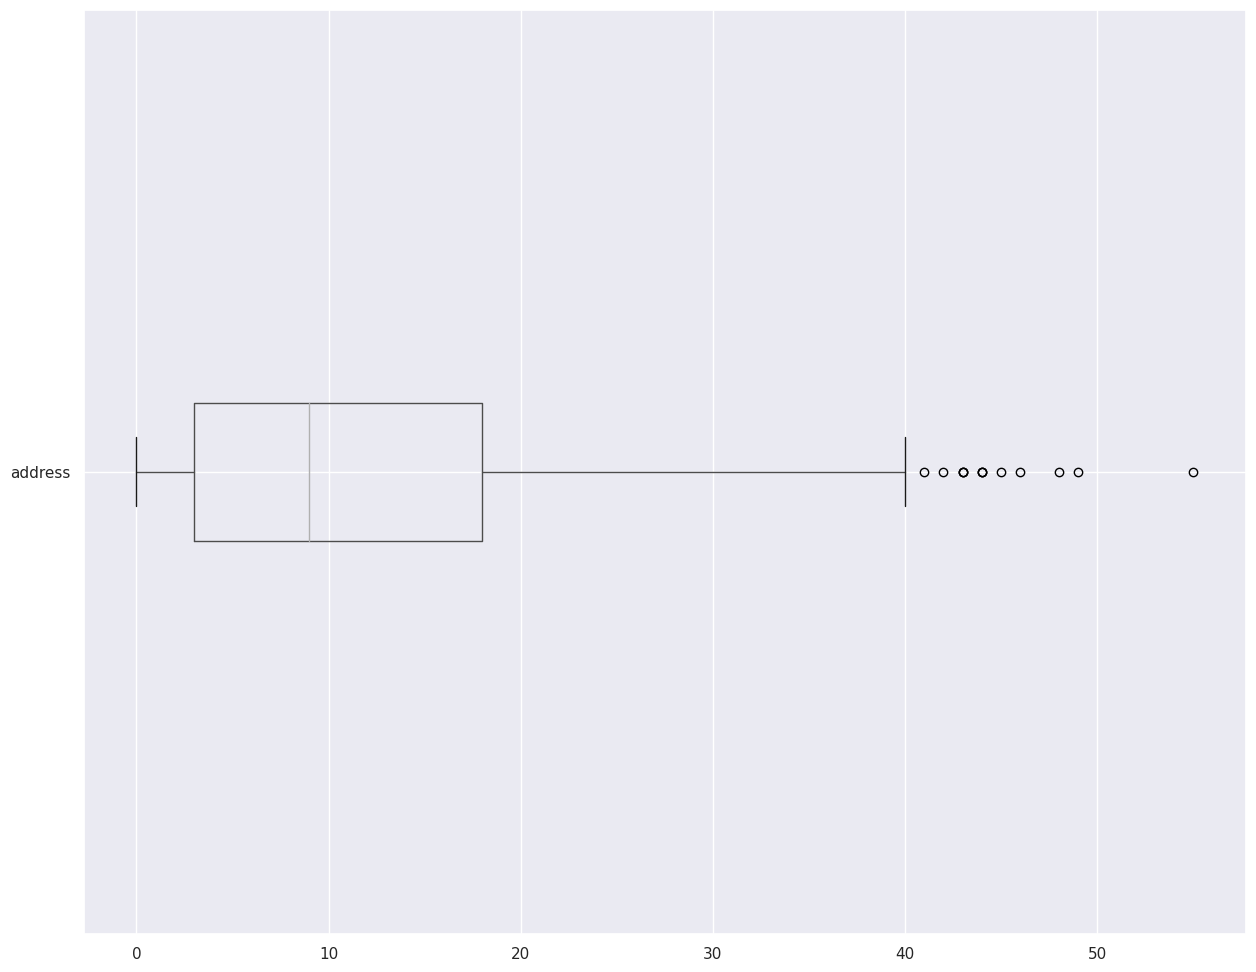

In [ ]:
# Histogram to show distribution
df['address'].plot(kind='hist')
plt.xlabel('Address', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='address', vert=False)
plt.show()

# Education

In [ ]:
df['ed'].value_counts()

2    287
4    234
3    209
1    204
5     66
Name: ed, dtype: int64

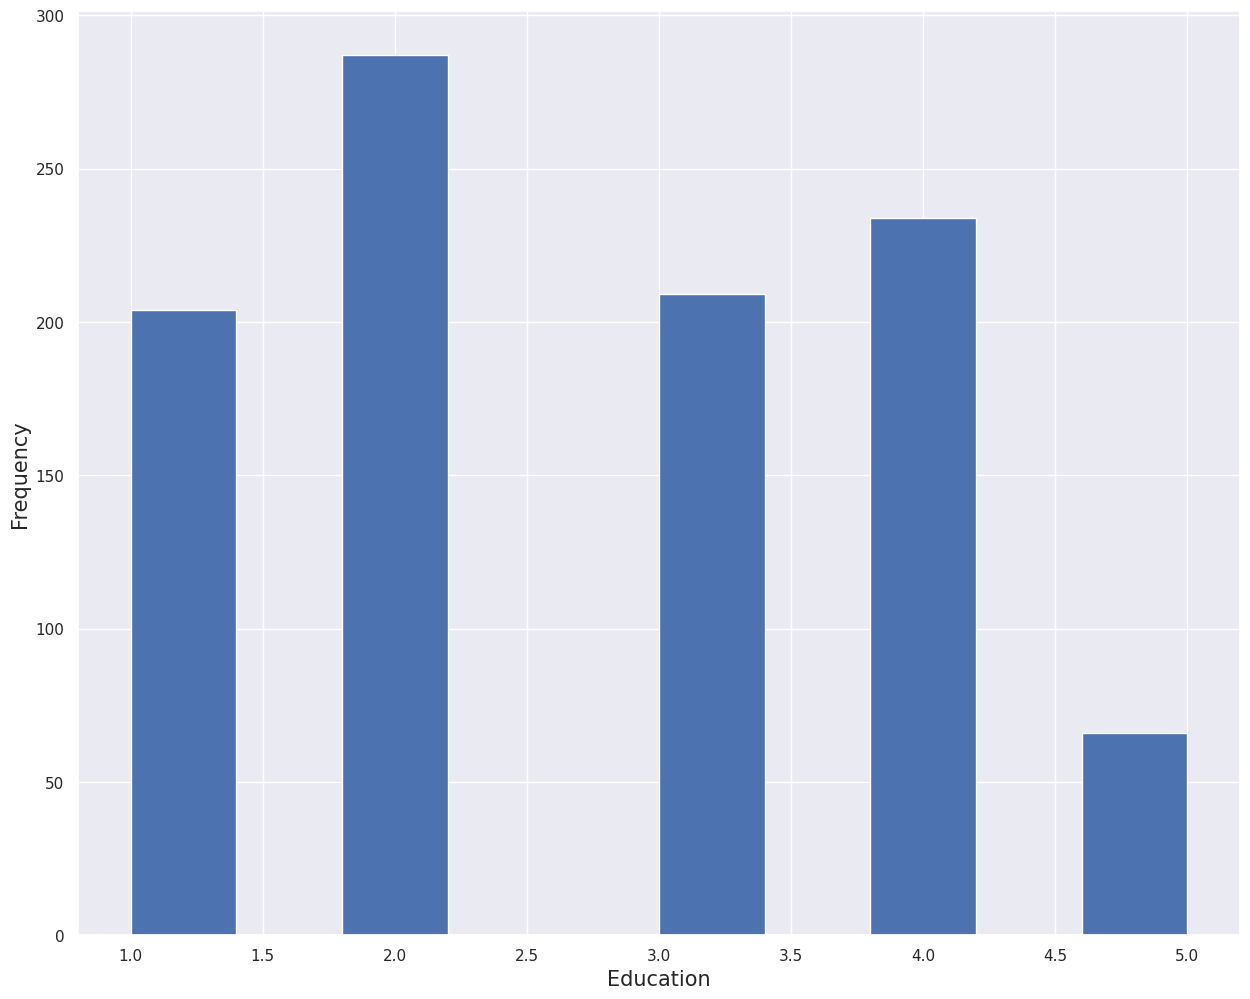

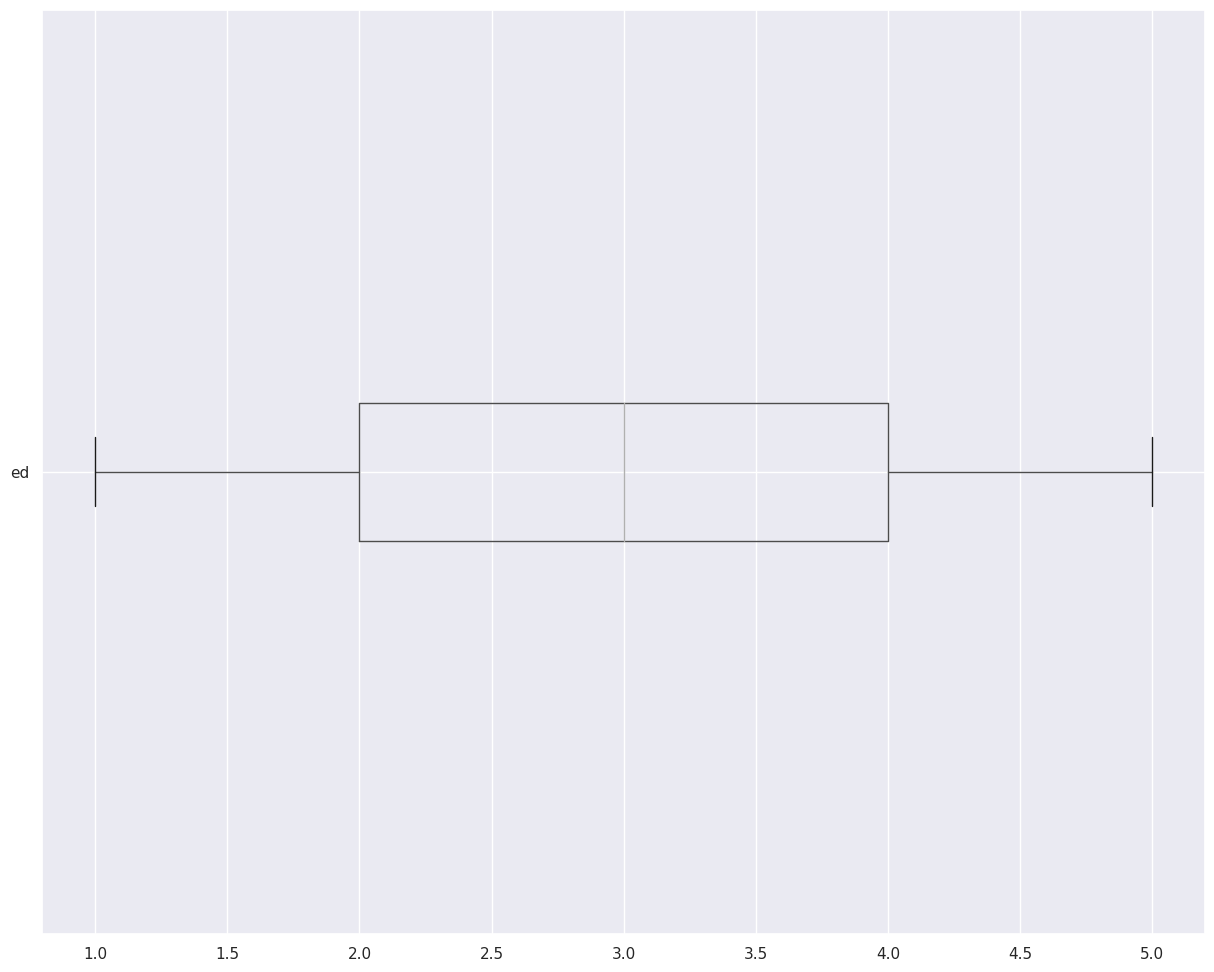

In [ ]:
# Histogram to show distribution
df['ed'].plot(kind='hist')
plt.xlabel('Education', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='ed', vert=False)
plt.show()

# Employment

In [ ]:
df['employ'].value_counts()

0     106
1      66
2      59
5      54
4      52
     ... 
44      2
41      2
45      2
38      1
47      1
Name: employ, Length: 46, dtype: int64

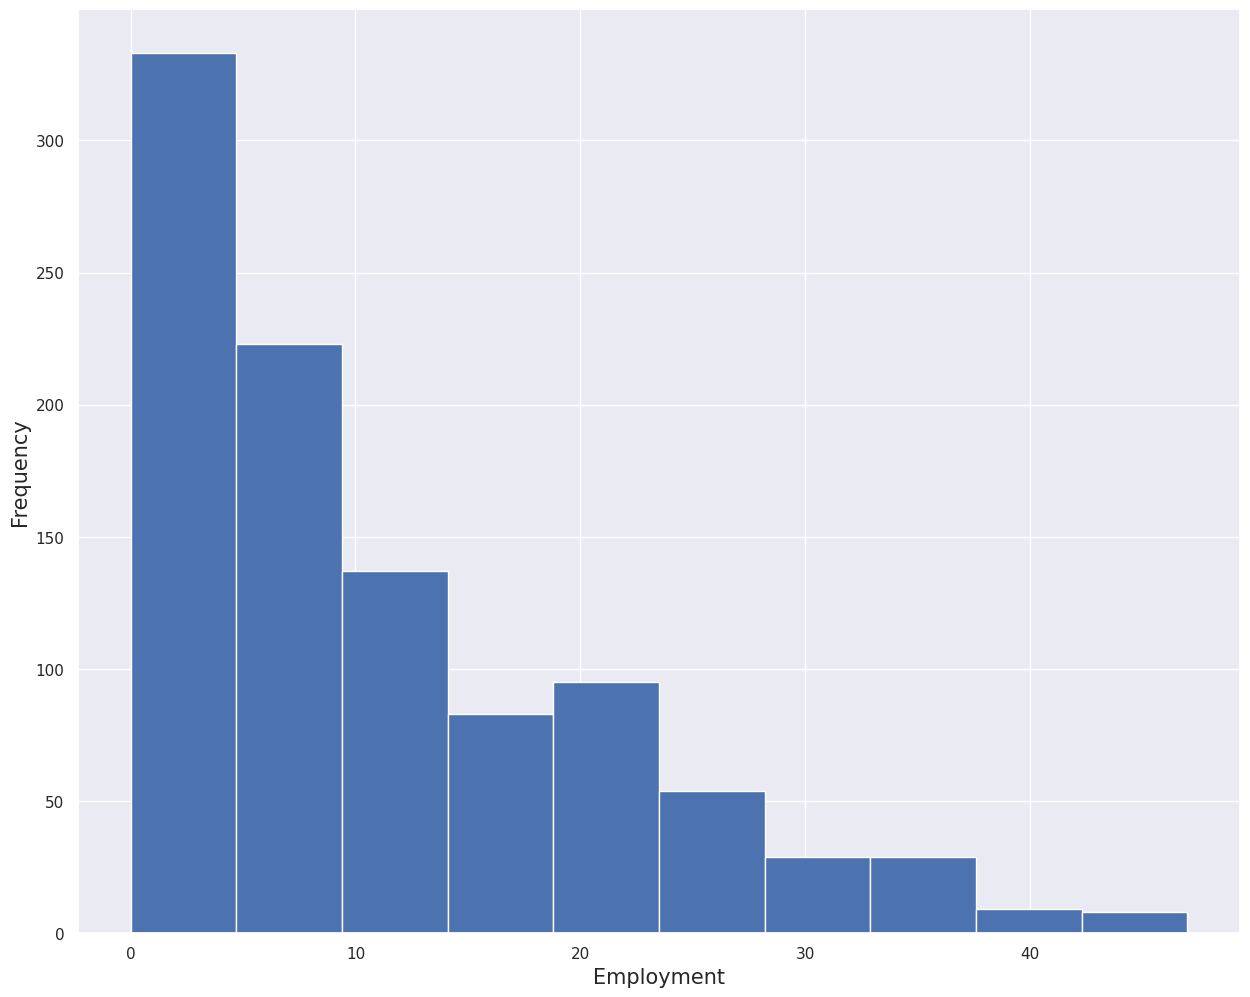

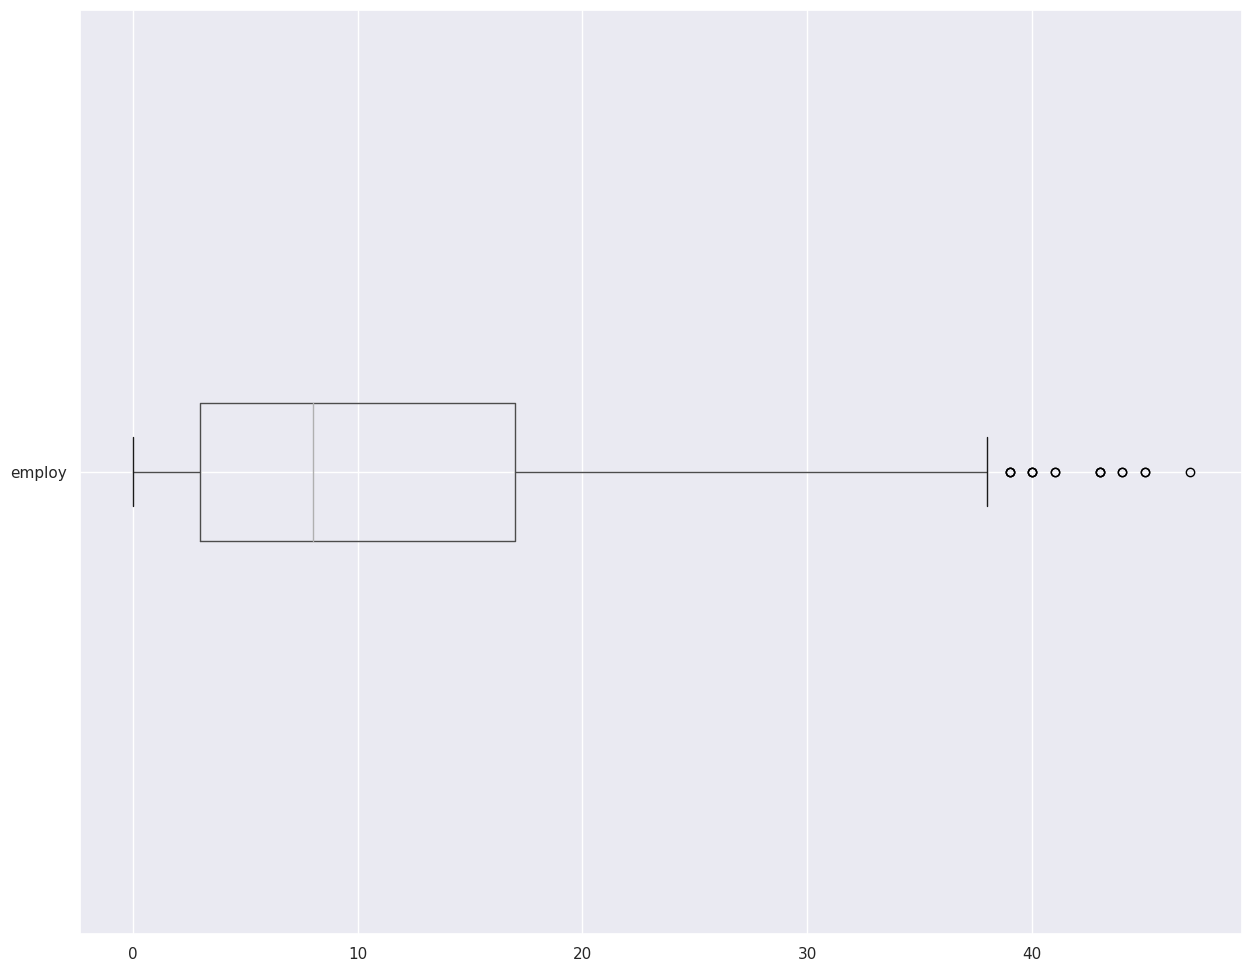

In [ ]:
# Histogram to show distribution
df['employ'].plot(kind='hist')
plt.xlabel('Employment', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='employ', vert=False)
plt.show()

# Retired

In [ ]:
df['retire'].value_counts()

0    953
1     47
Name: retire, dtype: int64

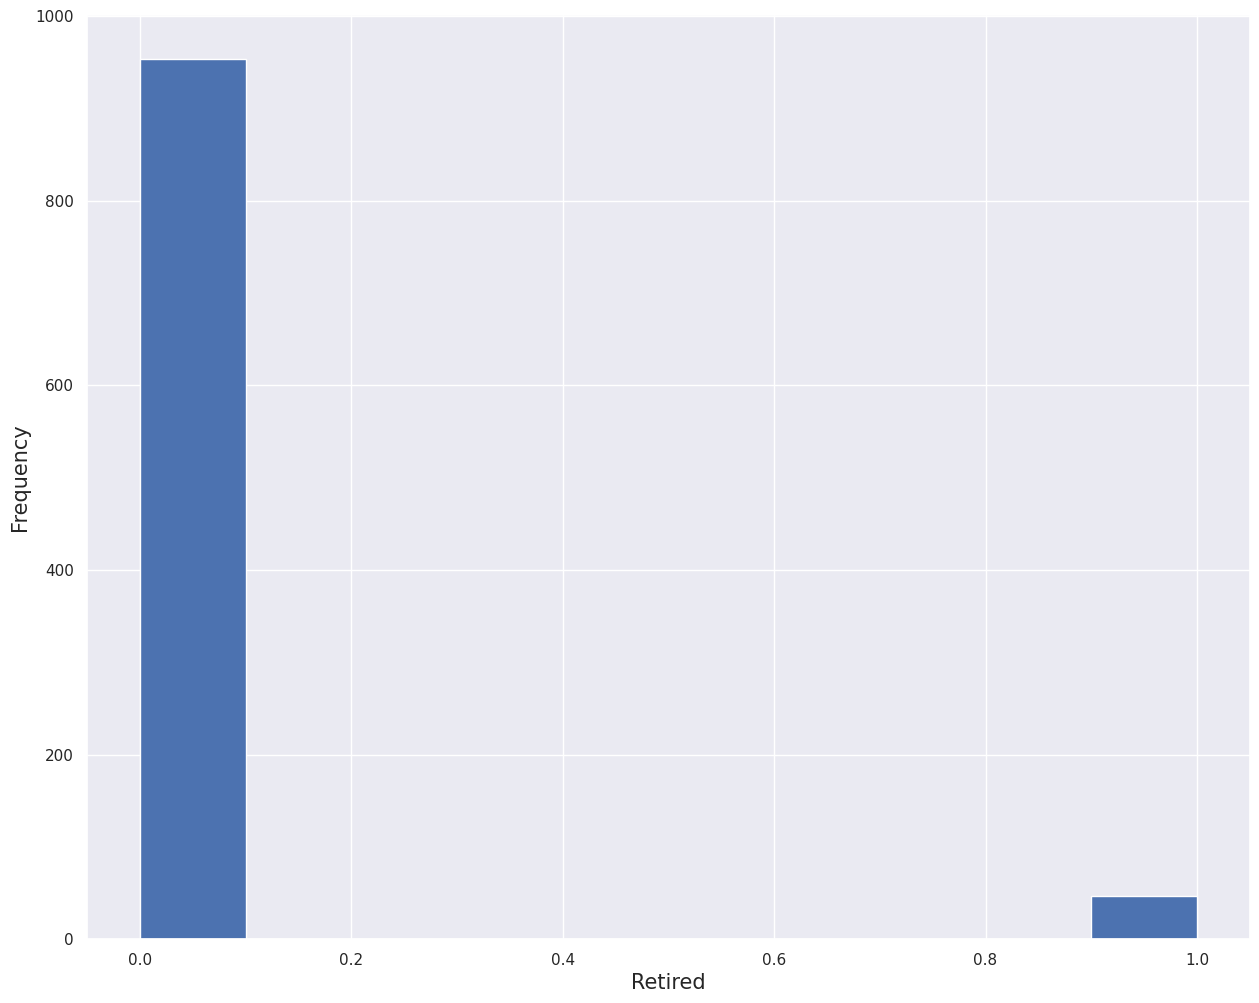

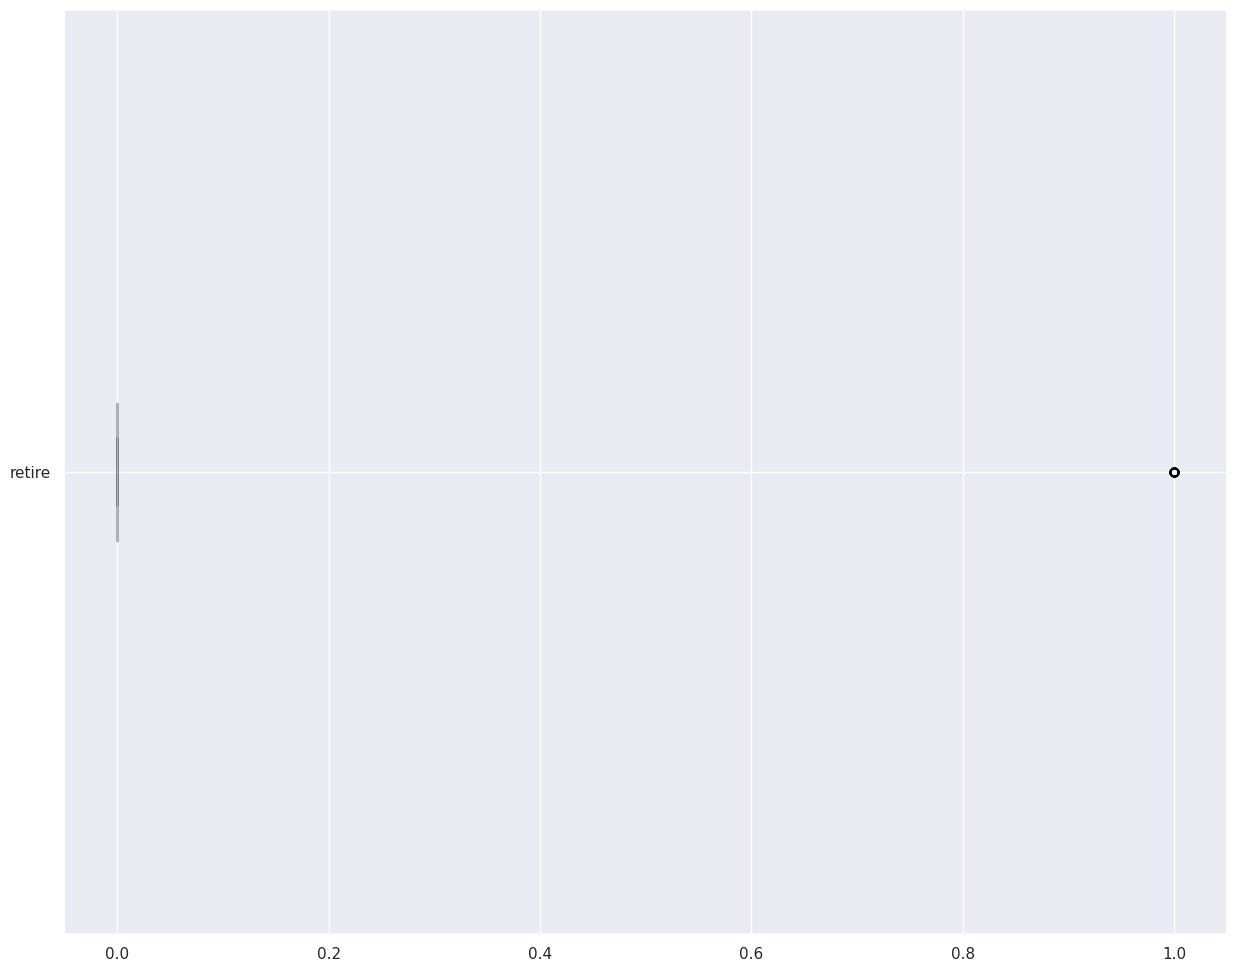

In [ ]:
# Histogram to show distribution
df['retire'].plot(kind='hist')
plt.xlabel('Retired', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='retire', vert=False)
plt.show()

# Gender

In [ ]:
df['gender'].value_counts()

1    517
0    483
Name: gender, dtype: int64

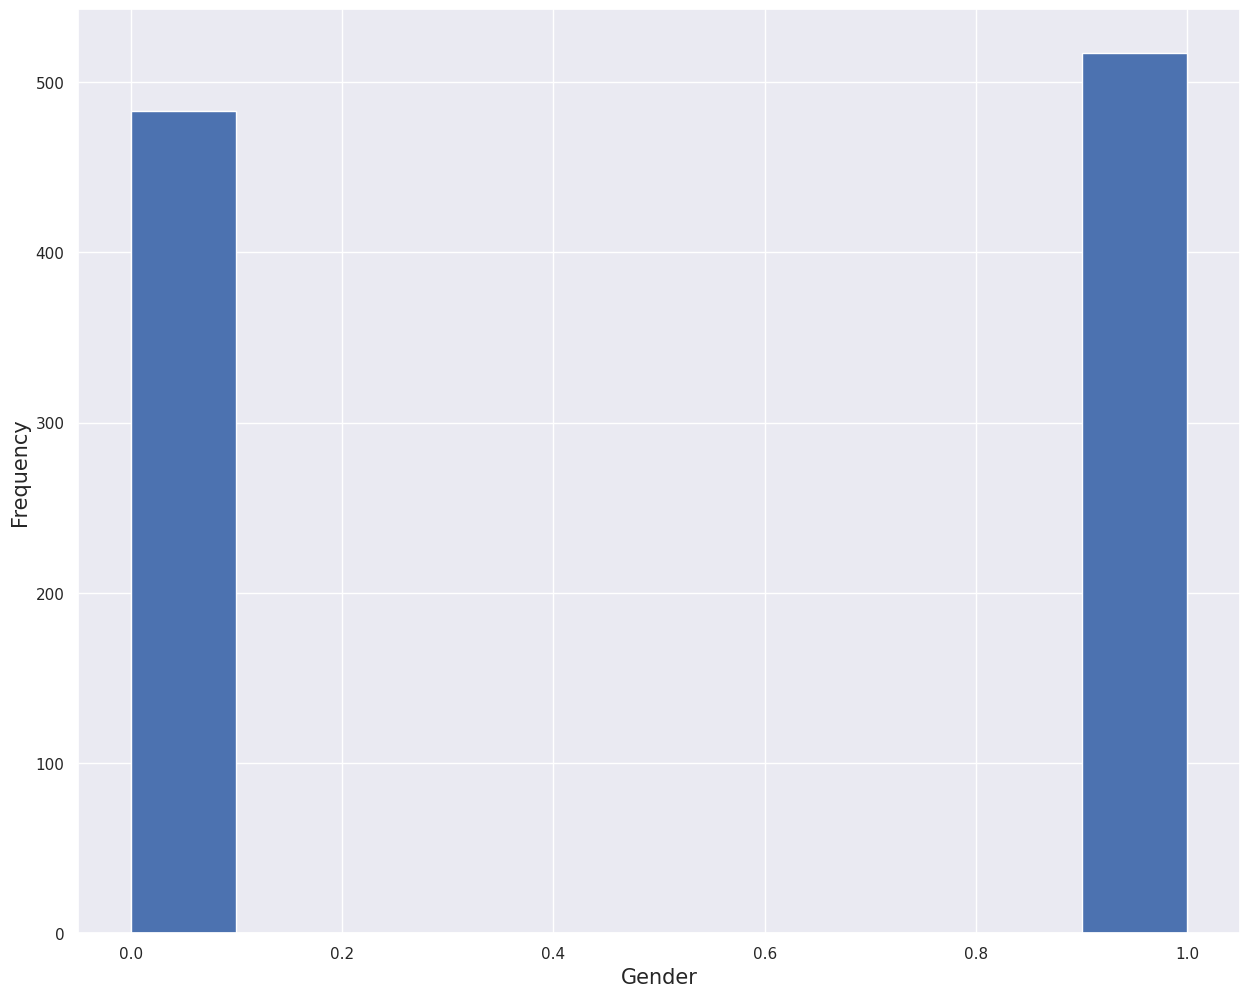

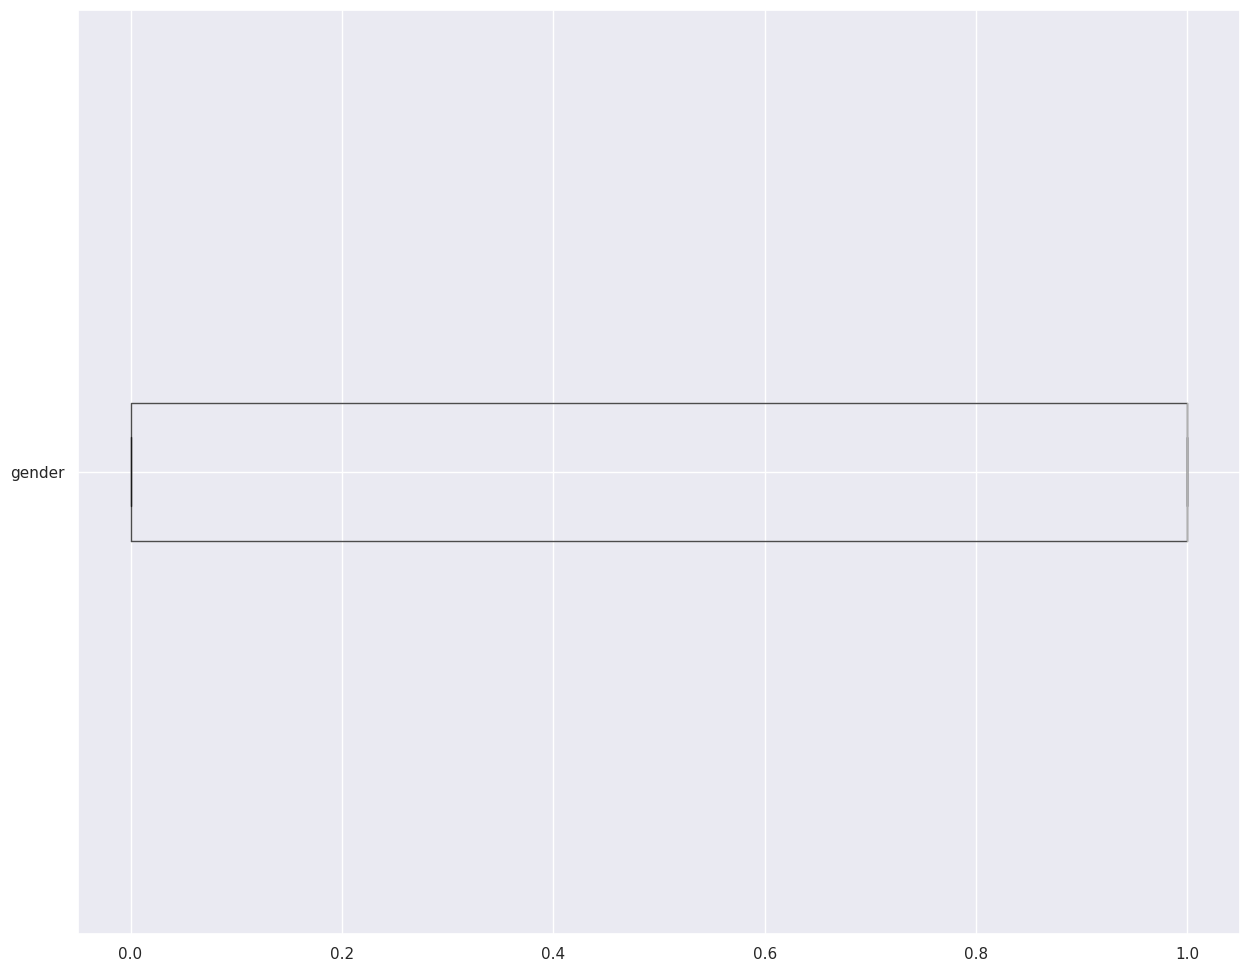

In [ ]:
# Histogram to show distribution
df['gender'].plot(kind='hist')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='gender', vert=False)
plt.show()

# Residence

In [ ]:
df['reside'].value_counts()

1    375
2    272
3    138
4    120
5     60
6     29
7      4
8      2
Name: reside, dtype: int64

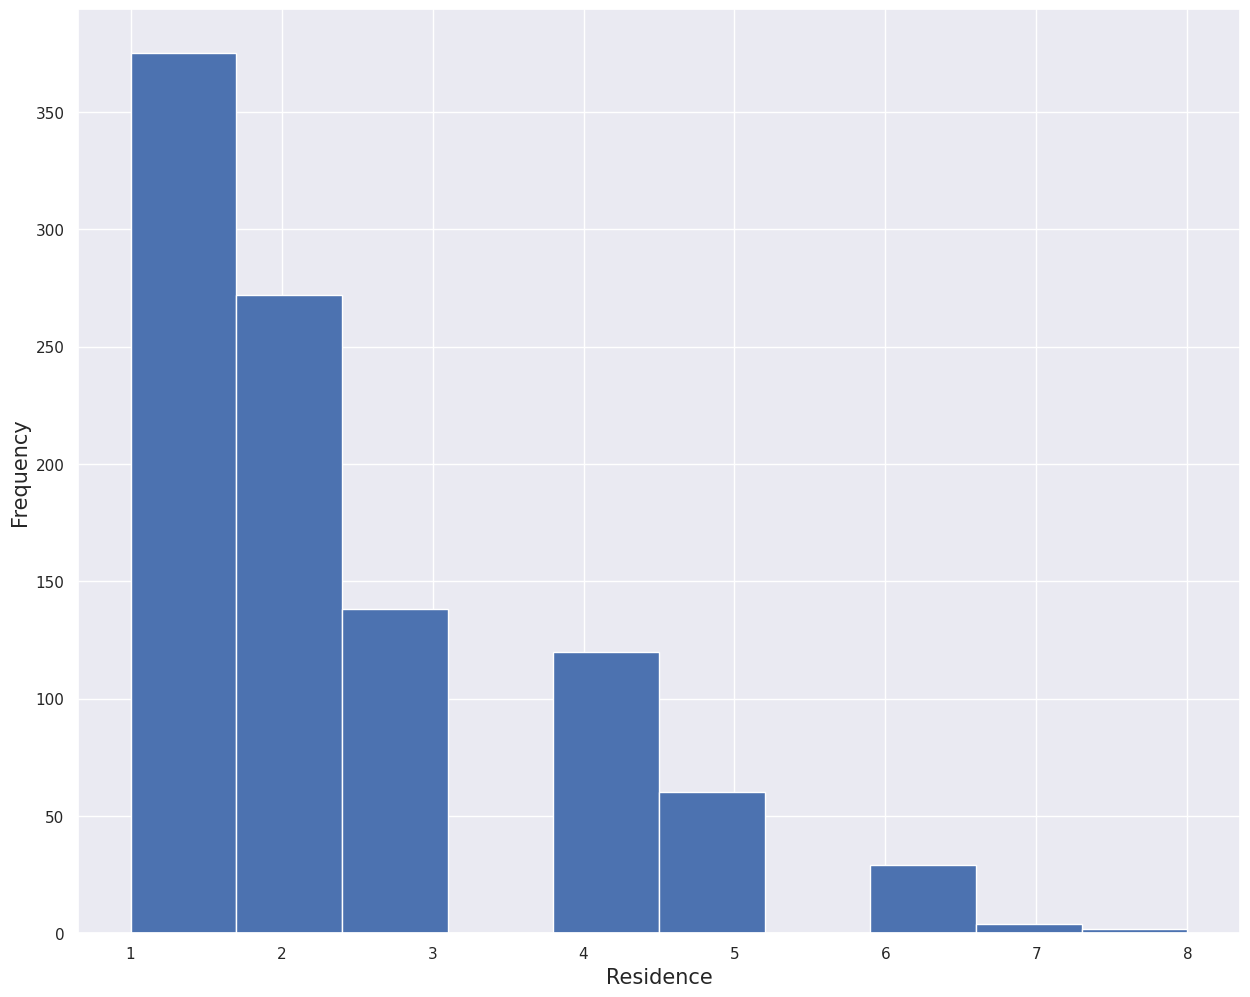

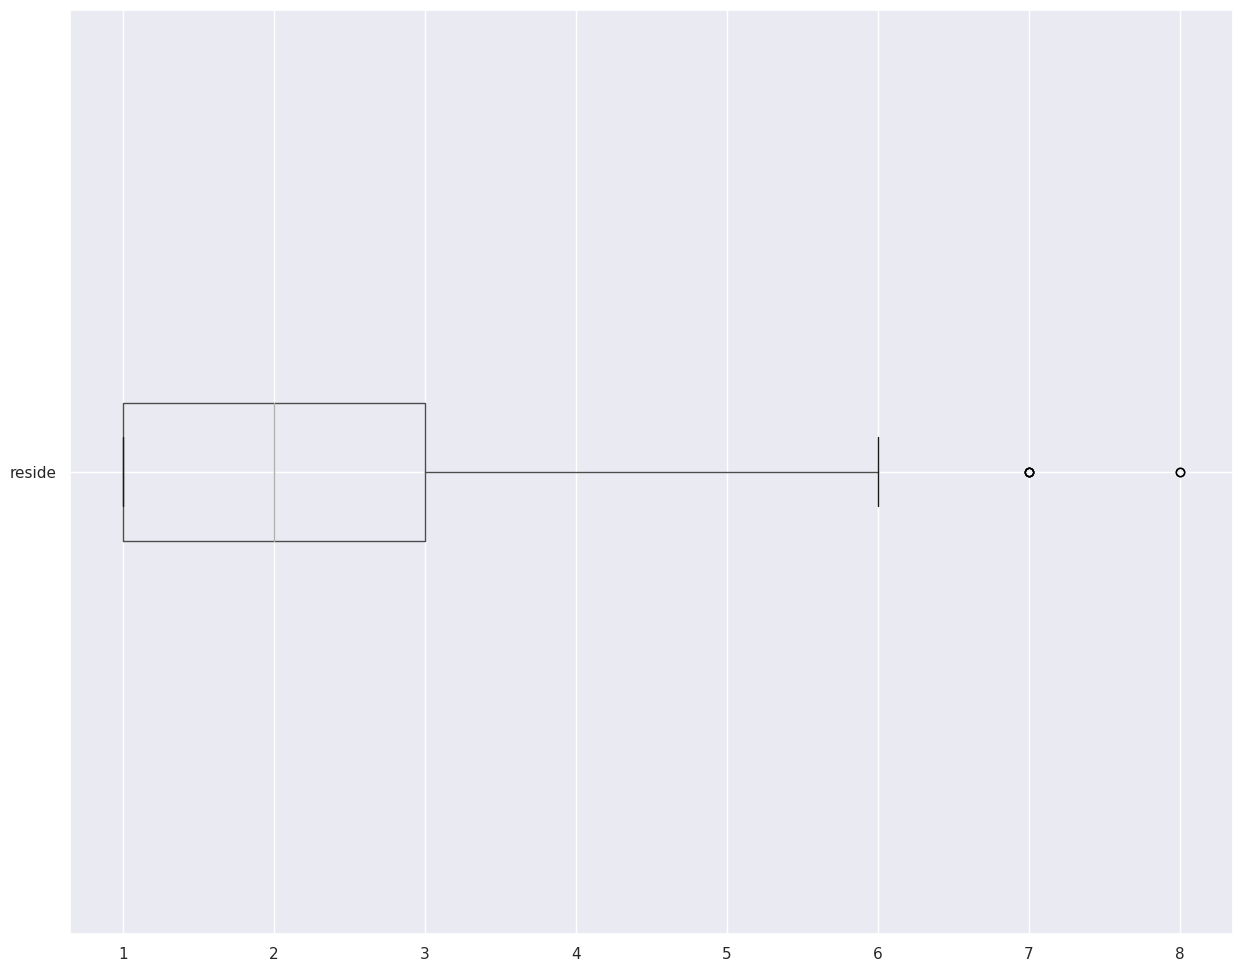

In [ ]:
# Histogram to show distribution
df['reside'].plot(kind='hist')
plt.xlabel('Residence', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# Boxplot to show distribution
# Anything above top and bottom whiskers are outliers
# Inside the box is inner quartile range, middle line is median value
df.boxplot(column='reside', vert=False)
plt.show()

# **Data Preprocessing**

In [ ]:
# Dropping categorization column
df = df.drop(['custcat'], axis=1)# axis=1 deletes column, axis=0 deletes row

# Shuffling Dataset

In [ ]:
from sklearn.utils import shuffle

In [ ]:
df = shuffle(df)

In [ ]:
df

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
899,2,20,46,23,0,2,5,4,0,1,2
489,1,18,29,40,0,4,2,1,0,0,1
117,1,40,29,40,1,6,2,8,0,1,5
339,1,28,31,42,1,0,4,5,0,1,3
610,3,17,21,25,1,0,2,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
573,1,11,24,31,1,0,2,3,0,1,4
373,2,16,26,21,0,7,4,1,0,0,6
741,3,60,57,72,1,18,5,30,1,0,2
233,2,7,37,57,0,5,4,1,0,0,1


# Normalize or Standardize Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_m = MinMaxScaler()

In [ ]:
df = scaler_m.fit_transform(df.values)

In [ ]:
df.shape

(1000, 11)

# **Invoking the Elbow and Silhouette Methods**

In [ ]:
from sklearn.cluster import KMeans

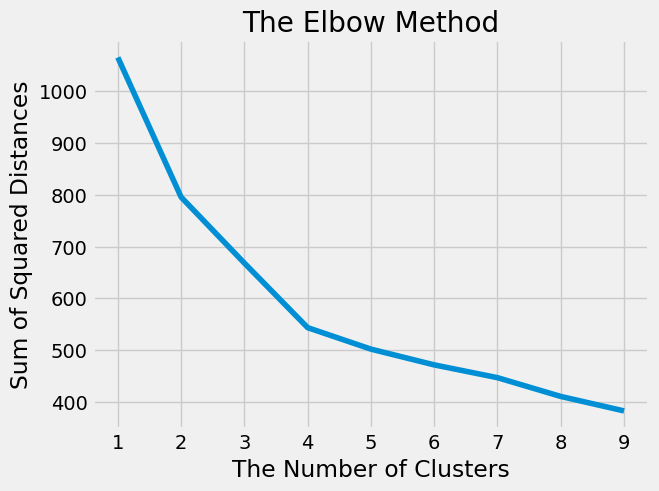

In [ ]:
# Finding optimal number of clusters
# Within-cluster Sum of Squares
wss = [] # Creating an empty list wss: Within Sum of Squares, how we calculate distance from the centroid
for i in range(1, 10):
  km = KMeans(n_clusters = i, init='k-means++', random_state=42) # Calculating optimal number of clusters, assigning starting point/seed 42
  km.fit(df)
  wss.append(km.inertia_) # Pin inertia scores, measuring the goodness of clusters

plt.plot(range(1, 10), wss)
plt.title('The Elbow Method')
plt.xlabel('The Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.savefig('Elbow_Cluster')
plt.show()

# The elbow method calculates the optimal number of clusters to be 4 (k = 4).

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 10):
  km = KMeans(n_clusters = i, max_iter=100)
  km.fit(df)
  score = silhouette_score(df,km.labels_)
  print('For Cluster {}, the Silhouette Score is {}'.format(i, score))

For Cluster 2, the Silhouette Score is 0.25207640599990044
For Cluster 3, the Silhouette Score is 0.24262648492432237
For Cluster 4, the Silhouette Score is 0.3080561273698302
For Cluster 5, the Silhouette Score is 0.2919891471620502
For Cluster 6, the Silhouette Score is 0.2592622739051408
For Cluster 7, the Silhouette Score is 0.2550794028510743
For Cluster 8, the Silhouette Score is 0.24725152061204014
For Cluster 9, the Silhouette Score is 0.22890440711572851


# The silhouette method calculates k = 4 for optimal number of clusters.

# **Transform Data using PCA**

In [ ]:
from sklearn.decomposition import PCA # How we determine which of our features we're going to use for our grouping of clusters
pca = PCA()
X = pca.fit_transform(df)

# Initialize the Number of Clusters for KMeans

In [ ]:
km = KMeans(n_clusters=4) # Entering 4 as optimal number of clusters
label = km.fit_predict(X) # Training in a clustering method
unique_labels = np.unique(label)

# **Display Clusters Using Scatter Plot**

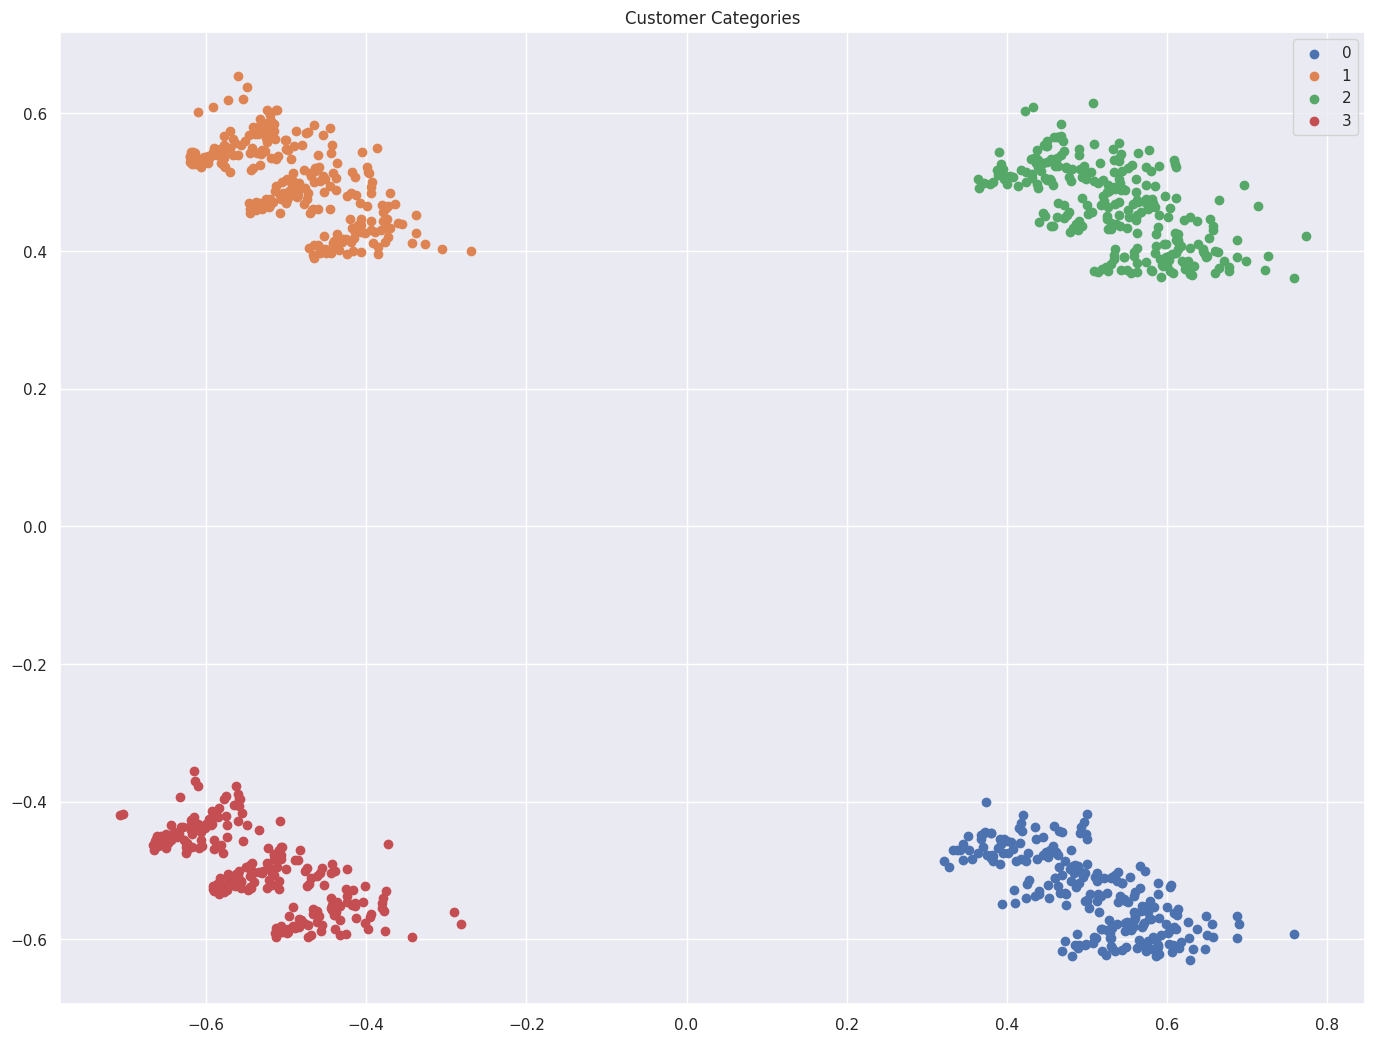

In [ ]:
# Plotting points based on PCA
for i in unique_labels:
  plt.scatter(X[label==i, 0], X[label==i, 1], label=i) # 0 - Row, 1 - Column

plt.legend()
plt.title('Customer Categories')
plt.savefig('Scatterplot_Cluster')
plt.show()